<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson2/GB_NN_intro_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Label is 0
Label is 0
Label is 0


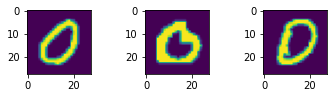

In [4]:
for i in range(3):
  ind = np.random.randint(0, train_images.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[ind])
  print(f'Label is {train_labels[ind]}')

In [5]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [6]:
input_size = train_images.shape[1]
# print(input_size)

In [7]:
def test_nn(train_images,
            train_labels,
            test_images,
            test_labels,
            n_layers: int = 2,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            optimizer: str = 'adam',
            n_epochs: int = 5,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

  # Build the model.

  model = Sequential()
  model.add(Dense(n1_neuron, input_shape=(input_size,), activation='relu'))
  # model.add(Dense(n2_neuron, activation='tanh'))
  # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
  if n_layers > 2: 
    for k in range(n_layers-2):
      model.add(Dense(n2_neuron, activation='tanh'))

  # выходной слой.
  model.add(Dense(10, activation='softmax'))


  # Compile the model.
  model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=n_epochs,
  batch_size=batch_size,
  validation_split=validation_split,
  verbose=verbose
  )

  # Evaluate the model.
  model.evaluate(
  test_images,
  to_categorical(test_labels)
  )

  return history.history

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [8]:
res_dict={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict[n_neurons] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9763


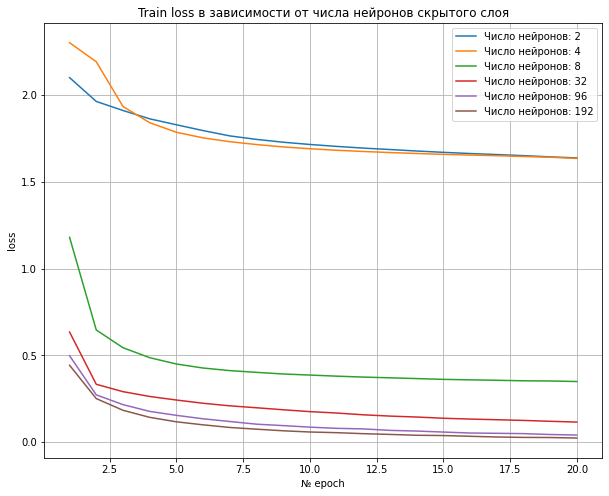

In [9]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

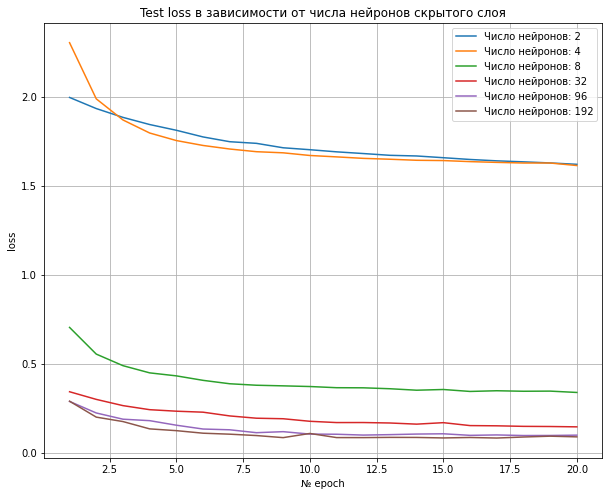

In [10]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя')
plt.show()

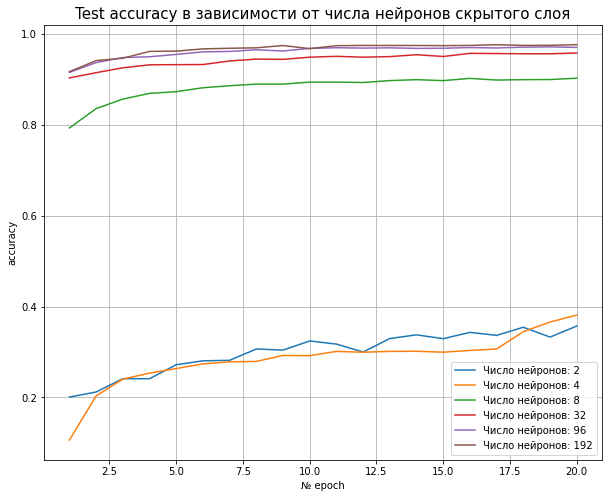

In [11]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_accuracy'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

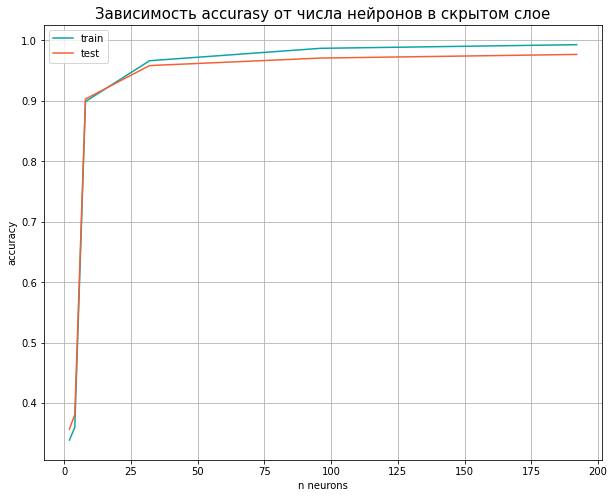

In [12]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict[n_neur]['accuracy'][19] for n_neur in res_dict]
res_test = [res_dict[n_neur]['val_accuracy'][19] for n_neur in res_dict]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Увеличение числа нейронов в скрытом слое двухслойной сети увеличивает качество модели. Впрочем, существует предел улучшения.

## **Провeрка обучения с разным количеством скрытых слоев**

In [13]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_2 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_2[n] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1421 - accuracy: 0.9604


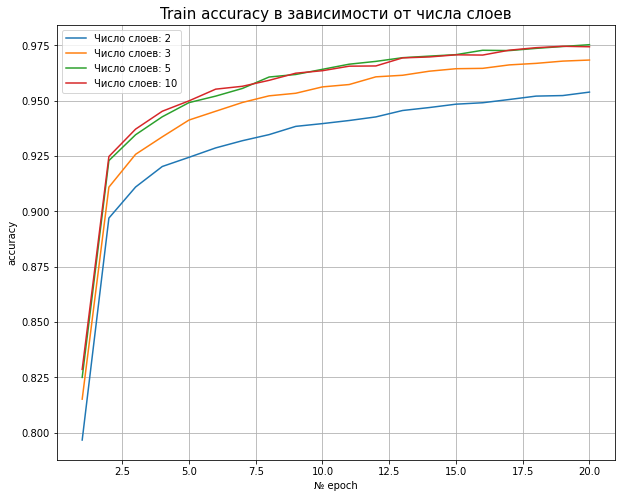

In [14]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

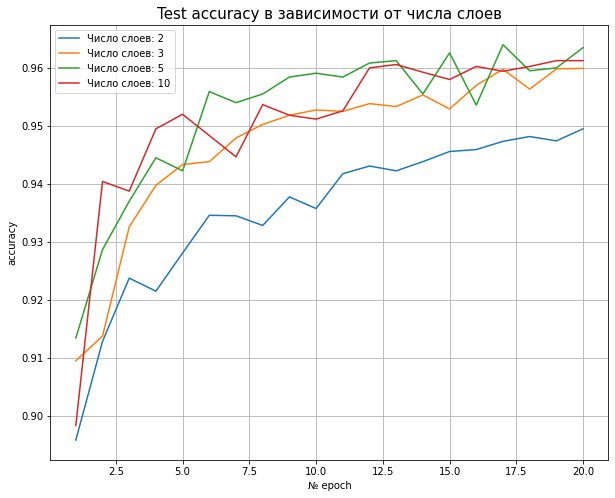

In [15]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев',size=15)
plt.show()

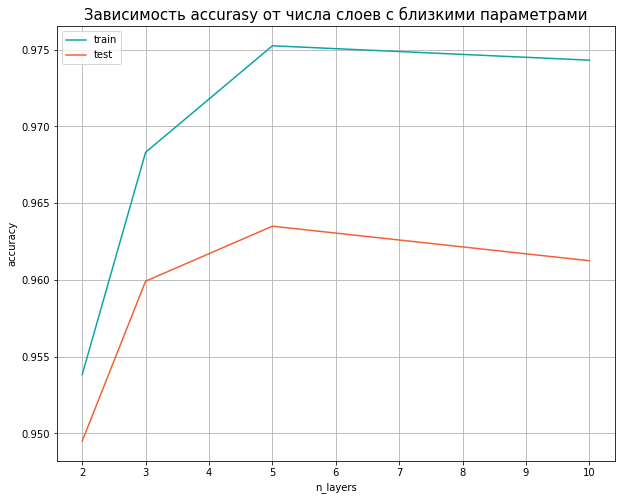

In [16]:
# n_layers = [2, 3, 5, 10]
res_train = [res_dict_2[n_lay]['accuracy'][19] for n_lay in res_dict_2]
res_test = [res_dict_2[n_lay]['val_accuracy'][19] for n_lay in res_dict_2]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

При создании слоёв с одинаковыми параметрами лучше всего показала себя сеть с 5 слоями. Впрочем, и 3 и 10 слоёв также показали себя достаточно хорошо.

## Провeрка обучения с разными оптимизаторами
(Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.)

In [17]:
res_dict_3 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_3[optim] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1243 - accuracy: 0.9610


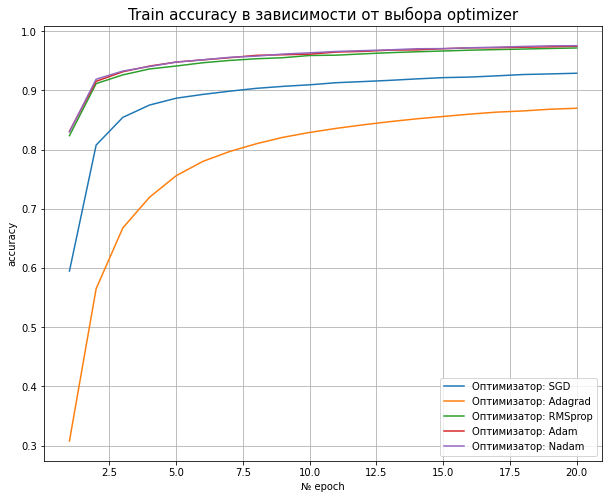

In [18]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

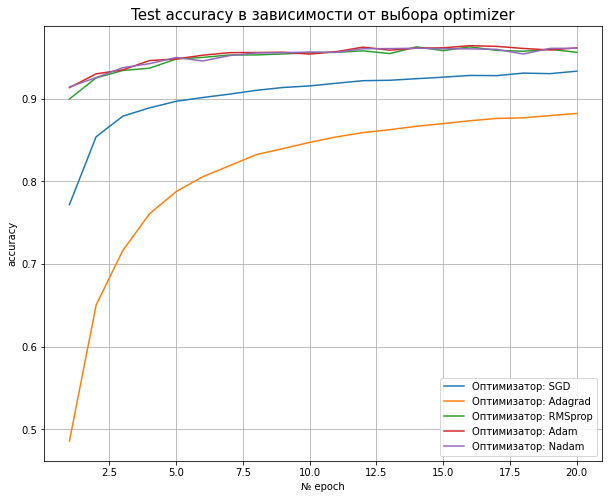

In [19]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['val_accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от выбора optimizer', size=15)
plt.show()

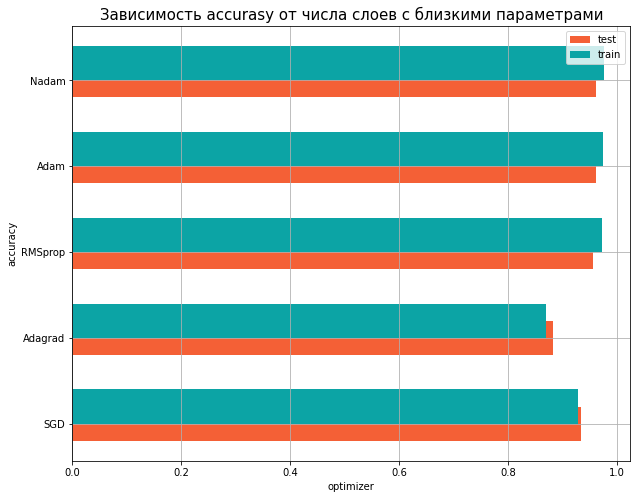

In [20]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_3[optim]['accuracy'][19] for optim in res_dict_3]
res_test = [res_dict_3[optim]['val_accuracy'][19] for optim in res_dict_3]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Хуже всего показали себя оптимизаторы adagrad и sgd. Остальные показали примерно равные результаты.


In [21]:
model_fin = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin.compile(loss='categorical_crossentropy', 
                optimizer='Nadam', 
                metrics=['accuracy'])

mod = model_fin.fit(train_images, to_categorical(train_labels),
                  epochs=40,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod.history

{'loss': [0.44744041562080383,
  0.21869954466819763,
  0.15893928706645966,
  0.12270402908325195,
  0.10038205981254578,
  0.08369404822587967,
  0.07040783762931824,
  0.06243278831243515,
  0.05363018810749054,
  0.045088689774274826,
  0.04009726271033287,
  0.03375525027513504,
  0.03137493506073952,
  0.02627450041472912,
  0.022446826100349426,
  0.02179684117436409,
  0.01694801077246666,
  0.016182418912649155,
  0.015432210639119148,
  0.012995496392250061,
  0.012355521321296692,
  0.015082595869898796,
  0.011575225740671158,
  0.011502867564558983,
  0.01407410018146038,
  0.01400479394942522,
  0.00820352602750063,
  0.00559651805087924,
  0.01198276411741972,
  0.014705945737659931,
  0.007474047131836414,
  0.0032241707667708397,
  0.0059682154096663,
  0.01715700514614582,
  0.007804675493389368,
  0.007004458922892809,
  0.008589480072259903,
  0.00807176623493433,
  0.006822892930358648,
  0.011331318877637386],
 'accuracy': [0.8693958520889282,
  0.9357500076293945

In [22]:
print(f"Метрика на train: {max(mod.history['accuracy'])}", 
      f"Метрика на test: {max(mod.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9994166493415833
Метрика на test: 0.9764166474342346


In [23]:
N = 5
y_pred = model_fin.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [24]:
y_test = to_categorical(test_labels)

In [25]:
y_test_labels = np.argmax(y_test, axis=1)

In [26]:
test_confusion_matrix = confusion_matrix(y_test_labels, y_pred_class)
print(test_confusion_matrix)

[[ 967    1    1    0    0    4    3    2    1    1]
 [   0 1125    1    1    0    2    3    2    0    1]
 [   4    1 1000    5    5    2    3    7    4    1]
 [   0    1    6  980    1   12    0    4    1    5]
 [   1    0    0    1  967    0    5    2    1    5]
 [   5    0    0    5    1  872    5    1    0    3]
 [   6    2    0    1    3    5  940    0    1    0]
 [   2    4    9    3    5    0    0  996    1    8]
 [   6    2    4   11    6   13    5    3  918    6]
 [   3    2    0    4   14    5    1    5    0  975]]


In [27]:
print(classification_report(y_test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.95      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.94      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Задание 2.

Используем набор примеров fashion-MNIST

1) Опишите - какой результат нейросети получен в зависимости от:

* числа нейронов в слое (для 2-х слойной сети),

* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

* фиксируйте для тренировочного и тестового набора метрики accuracy.

In [28]:
from keras.datasets import fashion_mnist

In [29]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


In [30]:
X_train.min(), X_train.max()

(0, 255)

In [31]:
classes = {'0': 'T-shirt/top',
           '1': 'Trouser',
           '2': 'Pullover',
           '3': 'Dress',
           '4': 'Coat',
           '5': 'Sandal',
           '6': 'Shirt',
           '7': 'Sneaker',
           '8': 'Bag',
           '9': 'Ankle boot'}

Label is 5
Label is 9
Label is 6


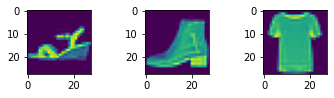

In [32]:
for i in range(3):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[ind])
  print(f'Label is {y_train_labels[ind]}')

In [33]:
# Normalize the images.
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

print(X_train.min(), X_train.max())

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)

0.0 1.0
(60000, 784)
(10000, 784)


In [34]:
input_size = X_test.shape[1]

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [35]:
res_dict_4={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict_4[n_neurons] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3519 - accuracy: 0.8842


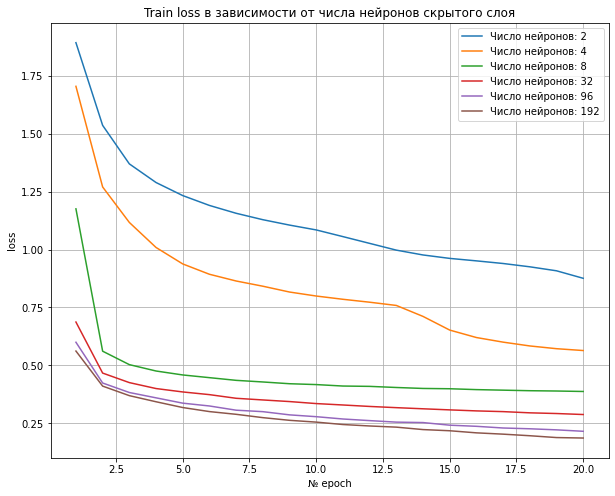

In [36]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

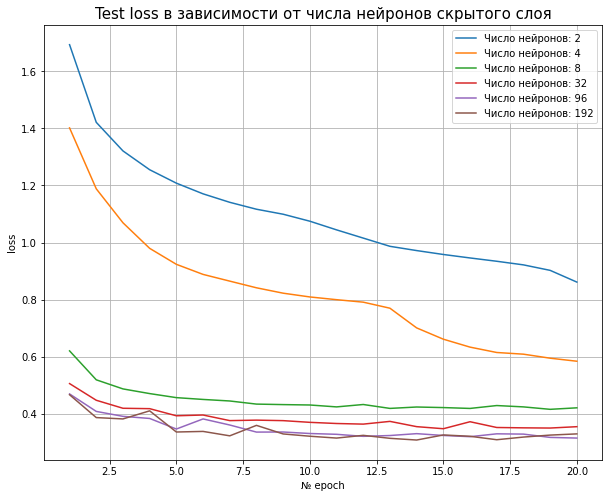

In [37]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

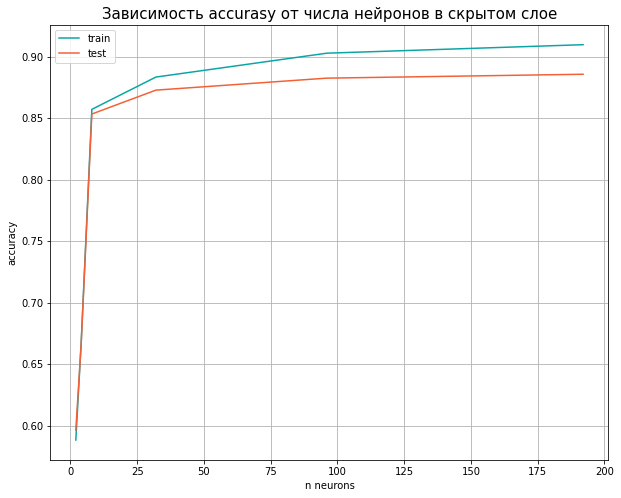

In [38]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict_4[n_neur]['accuracy'][10] for n_neur in res_dict_4]
res_test = [res_dict_4[n_neur]['val_accuracy'][10] for n_neur in res_dict_4]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## **Проверка обучения с разным количеством скрытых слоев**

In [39]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_5 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_5[n] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8743


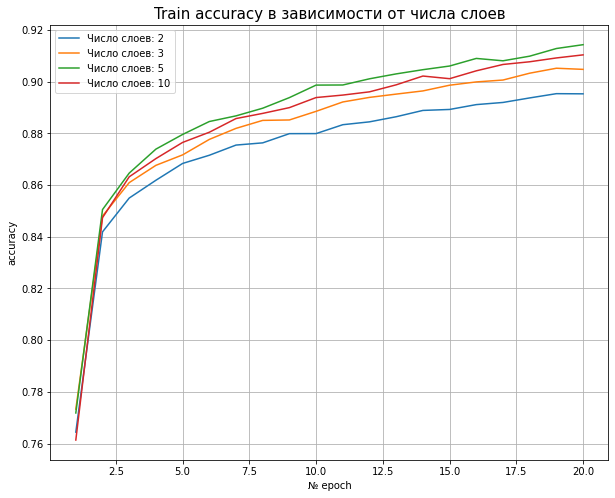

In [40]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

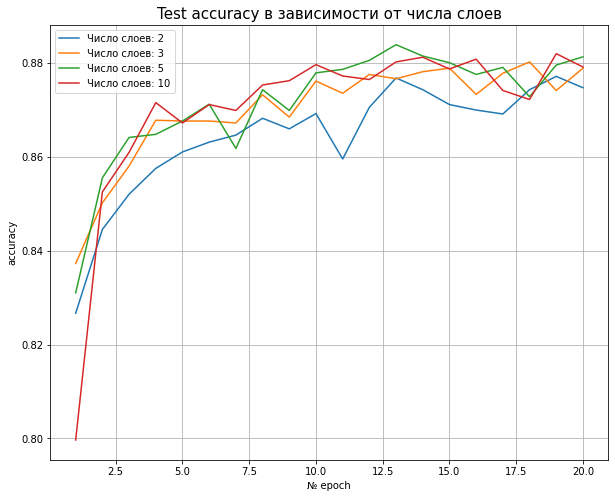

In [41]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев', size=15)
plt.show()

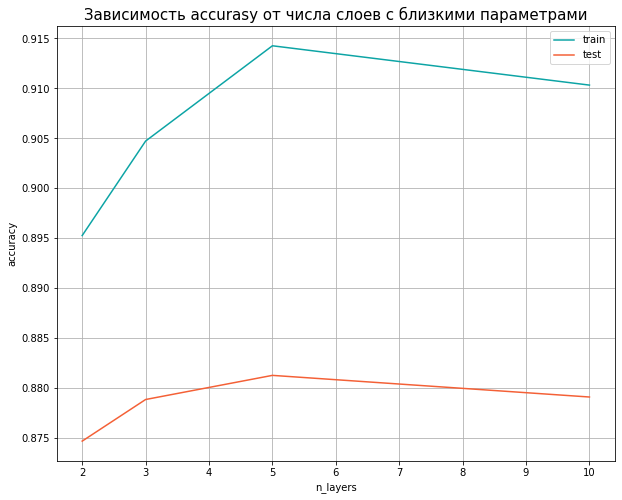

In [42]:
res_train = [res_dict_5[n_lay]['accuracy'][19] for n_lay in res_dict_5]
res_test = [res_dict_5[n_lay]['val_accuracy'][19] for n_lay in res_dict_5]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал вариант с пятью слоями. Т.е. увеличение количества слоёв улучшает характеристики, но существует оптимум.

## Провeрка обучения с разными оптимизаторами

2) Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [43]:
res_dict_6 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_6[optim] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8742


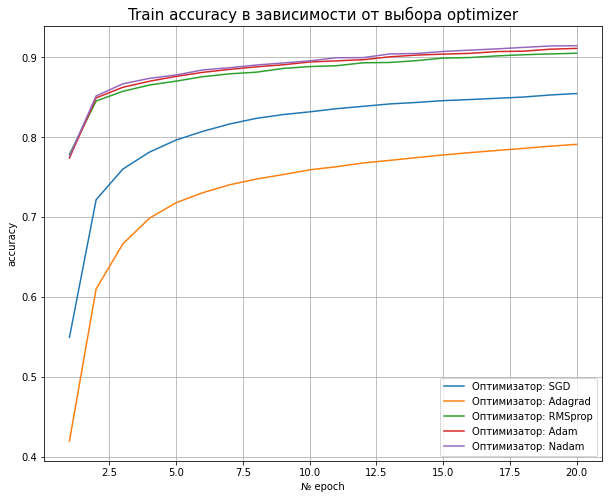

In [44]:
plt.figure(figsize=(10, 8))
for optim in res_dict_6:
        plt.plot(x, res_dict_6[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

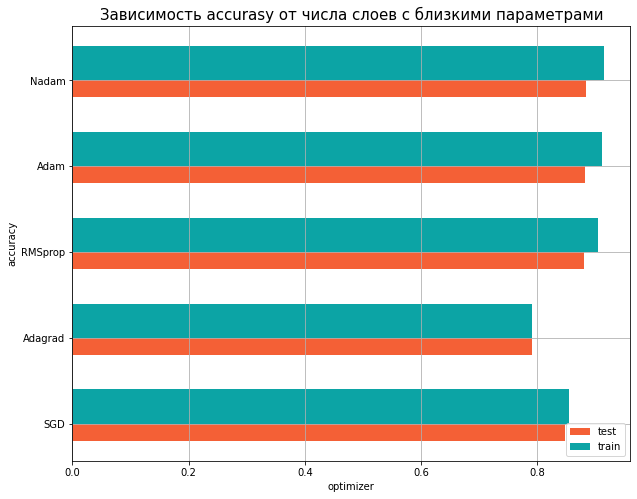

In [45]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_6[optim]['accuracy'][19] for optim in res_dict_6]
res_test = [res_dict_6[optim]['val_accuracy'][19] for optim in res_dict_6]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал оптимизатор Nadam

## Вывод по улучшению

3) Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Увеличение числа нейронов, выбор оптимизатора, увеличение числа эпох. Также существует зависимость от размера батчей.

## Матрица

4) Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [46]:
model_fin_2 = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin_2.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod_2 = model_fin_2.fit(X_train, to_categorical(y_train_labels),
                  epochs=20,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod_2.history

{'loss': [0.5528548359870911,
  0.3912534713745117,
  0.35660818219184875,
  0.33127066493034363,
  0.31326353549957275,
  0.2959807217121124,
  0.28248104453086853,
  0.27369263768196106,
  0.26304003596305847,
  0.24887245893478394,
  0.24157220125198364,
  0.2311222106218338,
  0.2219018191099167,
  0.2173050343990326,
  0.2140805423259735,
  0.20413999259471893,
  0.19880911707878113,
  0.1904020458459854,
  0.18430973589420319,
  0.17928621172904968],
 'accuracy': [0.8046666383743286,
  0.8584166765213013,
  0.8694999814033508,
  0.8789166808128357,
  0.8854583501815796,
  0.8913124799728394,
  0.8953333497047424,
  0.8983749747276306,
  0.9011666774749756,
  0.9076041579246521,
  0.9100416898727417,
  0.9144999980926514,
  0.9186041951179504,
  0.9186041951179504,
  0.9197291731834412,
  0.9237083196640015,
  0.9265000224113464,
  0.929854154586792,
  0.9317499995231628,
  0.934208333492279],
 'val_loss': [0.418854296207428,
  0.3785078823566437,
  0.36474543809890747,
  0.344977

In [47]:
print(f"Метрика на train: {max(mod_2.history['accuracy'])}", 
      f"Метрика на test: {max(mod_2.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.934208333492279
Метрика на test: 0.8924166560173035


In [48]:
N = 5
y_pred_2 = model_fin_2.predict(X_test)
y_pred_class_2 = np.argmax(y_pred_2, axis=1)

313/313 [==============================] - 1s 2ms/step


In [49]:
y_test_2 = to_categorical(y_test_labels)

In [50]:
y_test_labels_2 = np.argmax(y_test_2, axis=1)

In [51]:
test_confusion_matrix = confusion_matrix(y_test_labels_2, y_pred_class_2)
print(test_confusion_matrix)

[[760   3  17  19   5   0 188   1   6   1]
 [  3 976   2  11   2   0   5   0   0   1]
 [  8   2 778  17 106   0  87   0   2   0]
 [ 15  16  10 875  46   0  34   0   4   0]
 [  0   0  71  19 827   1  80   0   2   0]
 [  0   0   0   1   0 950   0  20   3  26]
 [ 74   2  73  30  61   0 755   0   5   0]
 [  0   0   0   0   0  27   0 932   0  41]
 [  5   0   6   4   6   2  12   4 961   0]
 [  0   0   0   0   0   8   1  32   0 959]]


In [52]:
print(classification_report(y_test_labels_2, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.78      0.80      1000
           3       0.90      0.88      0.89      1000
           4       0.79      0.83      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.65      0.76      0.70      1000
           7       0.94      0.93      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [53]:
classification_report(y_test_labels_2, y_pred_class_2, 
                      output_dict=True, 
                      target_names=classes.values())

{'T-shirt/top': {'precision': 0.8786127167630058,
  'recall': 0.76,
  'f1-score': 0.8150134048257373,
  'support': 1000},
 'Trouser': {'precision': 0.9769769769769769,
  'recall': 0.976,
  'f1-score': 0.976488244122061,
  'support': 1000},
 'Pullover': {'precision': 0.812957157784744,
  'recall': 0.778,
  'f1-score': 0.795094532447624,
  'support': 1000},
 'Dress': {'precision': 0.8965163934426229,
  'recall': 0.875,
  'f1-score': 0.8856275303643725,
  'support': 1000},
 'Coat': {'precision': 0.785375118708452,
  'recall': 0.827,
  'f1-score': 0.8056502679006331,
  'support': 1000},
 'Sandal': {'precision': 0.9615384615384616,
  'recall': 0.95,
  'f1-score': 0.9557344064386318,
  'support': 1000},
 'Shirt': {'precision': 0.6497418244406197,
  'recall': 0.755,
  'f1-score': 0.698427382053654,
  'support': 1000},
 'Sneaker': {'precision': 0.942366026289181,
  'recall': 0.932,
  'f1-score': 0.9371543489190548,
  'support': 1000},
 'Bag': {'precision': 0.9776195320447609,
  'recall': 0.961